## What is Clustering 
- Cluster analysis is a technique used in data mining and machine learning to group similar objects into clusters.
- K-Means clustering is a method for grouping n observations into K clusters
- It uses vector quantization and aims to assign each observation to the cluster with the nearest mean or centroid.
- The main objective of K-Means algorithm is to minimize the sum of distance between the points and their respective cluster centroid.

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df = df.rename(columns={
    "Name": "name",
    "Age": "age",
    "Income($)":"income"
})
df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0.5, 1.0, 'Scatter for Age against Income')

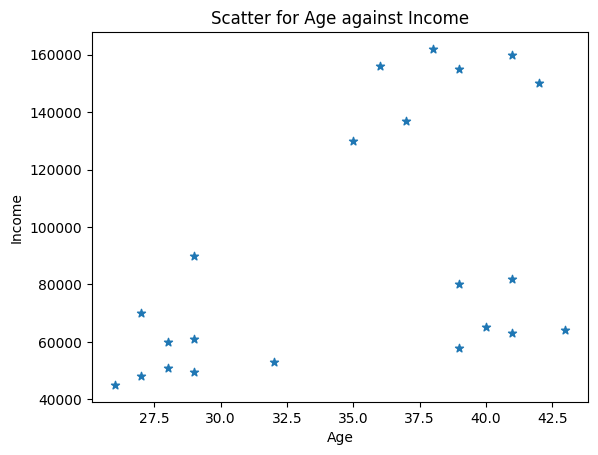

In [6]:
# visualize the data 
plt.scatter(df.age, df.income, marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatter for Age against Income")

In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['age', 'income']])
y_pred

C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
df['cluster'] = y_pred
df.head()

,name,age,income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [12]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

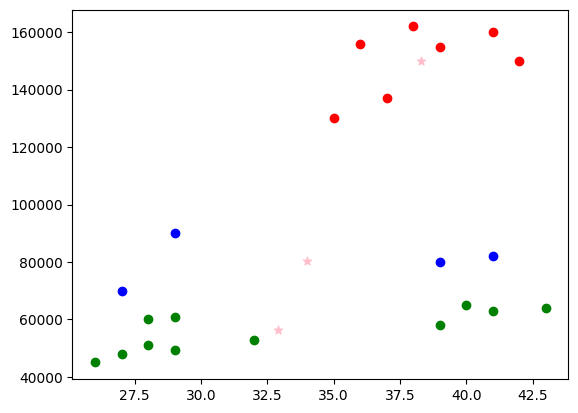

In [17]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.age, df1.income, color='green')
plt.scatter(df2.age, df2.income, color='red')
plt.scatter(df3.age, df3.income, color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='pink', marker='*')

In [18]:
# preprocess using the min max scaler 
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])


In [19]:
df.head()

,name,age,income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


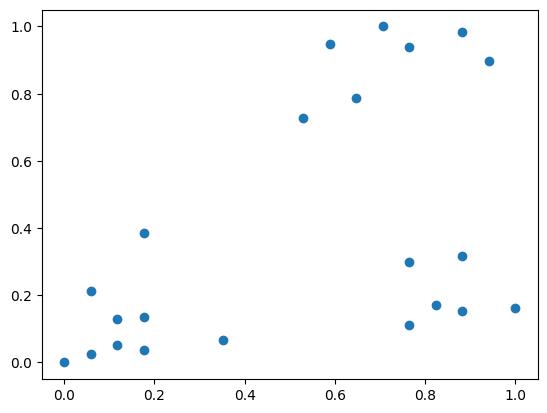

In [20]:
plt.scatter(df.age, df.income)

In [21]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['age', 'income']])
y_pred

C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [22]:
df['cluster'] = y_pred
df.head()

,name,age,income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [23]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

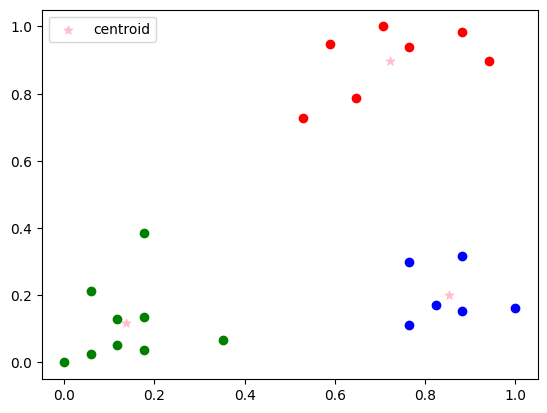

In [25]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.age, df1.income, color='green')
plt.scatter(df2.age, df2.income, color='red')
plt.scatter(df3.age, df3.income, color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='pink', marker='*', label='centroid')
plt.legend()

## Elbow plot 

In [26]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age', 'income']])
    sse.append(km.inertia_)

C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is kno

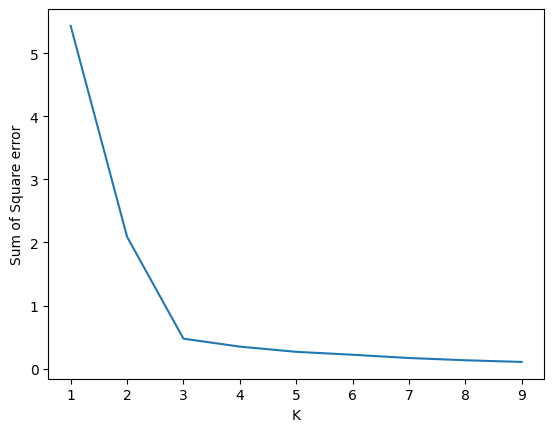

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of Square error')
plt.plot(k_range, sse)